Detected 1 face(s).


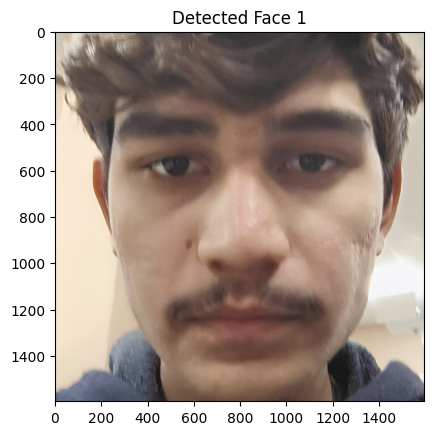

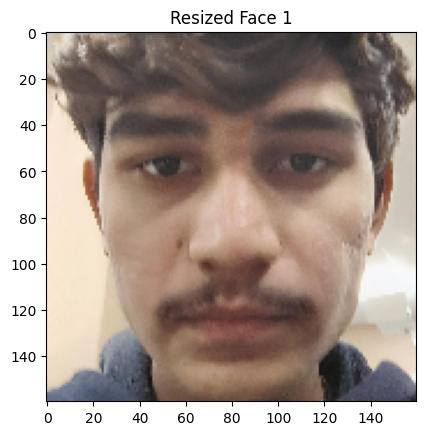

Face 1 saved to extract_face/Jay/aligned_face_1.jpg.


In [5]:
import cv2
import matplotlib.pyplot as plt
import os

# Load a pre-trained face detection model (e.g., Haar cascades)
face_cascade = cv2.CascadeClassifier("utils/haar_face.xml")

# Check if the cascade file is loaded correctly
if face_cascade.empty():
    raise IOError("Haar cascade file not found. Check the path.")

# Load an image
image_path = "Data/train/Prince/IMG_20240215_104719727_HDR.jpg"
image = cv2.imread(image_path)

# Check if the image is loaded correctly
if image is None:
    raise IOError(f"Image not found at {image_path}. Check the path.")

# Convert to grayscale for face detection
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

# Check if faces are detected
if len(faces) == 0:
    print("No faces detected.")
else:
    print(f"Detected {len(faces)} face(s).")

# Iterate over detected faces
for i, (x, y, w, h) in enumerate(faces):
    # Extract the face region
    face = image[y : y + h, x : x + w]

    # Convert face to RGB for displaying with matplotlib
    face_rgb = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
    plt.imshow(face_rgb)
    plt.title(f"Detected Face {i+1}")
    plt.show()

    # Resize the face to 160x160
    face_resized = cv2.resize(face, (160, 160))

    # Convert resized face to RGB for matplotlib
    face_resized_rgb = cv2.cvtColor(face_resized, cv2.COLOR_BGR2RGB)
    plt.imshow(face_resized_rgb)
    plt.title(f"Resized Face {i+1}")
    plt.show()

    # Save the aligned face image
    save_path = f"extract_face/Jay/aligned_face_{i+1}.jpg"
    os.makedirs(
        os.path.dirname(save_path), exist_ok=True
    )  # Ensure the directory exists
    cv2.imwrite(save_path, face_resized)
    print(f"Face {i+1} saved to {save_path}.")

In [7]:
filepath = "Data/train/"
import os

def load_image(filepath):
    
    for folder in os.listdir(filepath):
        for subfolder in os.listdir(filepath+folder):
            image_BGR = cv2.imread(filepath + folder + "/" + subfolder)
            # Convert to grayscale for face detection
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

            # Detect faces
            faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)
            
            for (x,y,w,h) in faces:
                
                face = image_BGR[y:y+h,x:x+w]
                
                cv2.imwrite("extract_face/" + folder + "/" + subfolder,face)

In [8]:
load_image(filepath)

In [9]:
!pip install mtcnn
!pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [5]:
!pip install numpy<2.0.0


The system cannot find the file specified.


In [10]:


from mtcnn import MTCNN

In [11]:
detector = MTCNN()

In [13]:
filepath = "Data/train/"
import numpy as np

def load_image(filepath):
    
    for folder in os.listdir(filepath):
        for subfolder in os.listdir(filepath+folder):
            image_BGR = cv2.imread(filepath + folder + "/" + subfolder)
            # Convert to grayscale for face detection
            color = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            # Detect faces
            #faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)
            
            face = detector.detect_faces(color)
            if face != []:
                box = np.array([face[0]['box']])
            
                for (x,y,w,h) in box:

                    face = image_BGR[y:y+h,x:x+w]

                    cv2.imwrite("extract_face/" + folder + "/" + subfolder,face)

In [14]:
load_image(filepath)

In [15]:
image = cv2.imread("extract_face/Ketul/IMG20241127160112_BURST004_32714670.jpg")
image.shape

(1523, 1187, 3)

In [16]:
import tensorflow as tf

tf.image.resize(image,(160,160)).shape

TensorShape([160, 160, 3])

In [18]:
!pip install face_recognition

Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [19]:
import face_recognition

In [3]:
pip install dlib

  Using cached dlib-19.24.2.tar.gz (11.8 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build dlib
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [73 lines of output]
  running bdist_wheel
  running build
  running build_ext
  <string>:125: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  Building extension for Python 3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]
  Invoking CMake setup: 'cmake C:\Users\admin\AppData\Local\Temp\pip-install-em9yinvm\dlib_4d0c825f3d2545568e0b0e6ce99f5f2d\tools\python -DCMAKE_LIBRARY_OUTPUT_DIRECTORY=C:\Users\admin\AppData\Local\Temp\pip-install-em9yinvm\dlib_4d0c825f3d2545568e0b0e6ce99f5f2d\build\lib.win-amd64-cpython-39 -DPYTHON_EXECUTABLE=C:\Users\admin\anaconda3\python.exe -DCMAKE_LIBRARY_OUTPUT_DIRECTORY_RELEASE=C:\Users\admin\AppData\Local\Temp\pip-install-em9yinvm\dlib_4d0c825f3d2545568e0b0e6ce99f5f2d\build\lib.win-amd64-cpython-39 -A x64'
  -- Building for: NMake Makefiles
  CMake Error at CMakeLists.txt:5 (message):
  
  
  
    !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [4]:
pip install dlib -vvv

Using pip 22.2.2 from C:\Users\admin\anaconda3\lib\site-packages\pip (python 3.9)
Non-user install because site-packages writeable
Created temporary directory: C:\Users\admin\AppData\Local\Temp\pip-ephem-wheel-cache-1q342fai
Created temporary directory: C:\Users\admin\AppData\Local\Temp\pip-build-tracker-_vq0_qzh
Initialized build tracking at C:\Users\admin\AppData\Local\Temp\pip-build-tracker-_vq0_qzh
Created build tracker: C:\Users\admin\AppData\Local\Temp\pip-build-tracker-_vq0_qzh
Entered build tracker: C:\Users\admin\AppData\Local\Temp\pip-build-tracker-_vq0_qzh
Created temporary directory: C:\Users\admin\AppData\Local\Temp\pip-install-jj3u73v2
1 location(s) to search for versions of dlib:
* https://pypi.org/simple/dlib/
Fetching project page and analyzing links: https://pypi.org/simple/dlib/
Getting page https://pypi.org/simple/dlib/
Found index url https://pypi.org/simple
Looking up "https://pypi.org/simple/dlib/" in the cache
Request header has "max_age" as 0, cache bypassed
St

  Running command pip subprocess to install build dependencies
  Using pip 22.2.2 from C:\Users\admin\anaconda3\Lib\site-packages\pip (python 3.9)
    Using cached setuptools-69.1.0-py3-none-any.whl (819 kB)
    Using cached wheel-0.42.0-py3-none-any.whl (65 kB)
    Using cached cmake-3.28.3-py2.py3-none-win_amd64.whl (35.7 MB)
    Creating C:\Users\admin\AppData\Local\Temp\pip-build-env-hxwqylz0\overlay\Scripts
  ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
  spyder 5.2.2 requires pyqt5<5.13, which is not installed.
  spyder 5.2.2 requires pyqtwebengine<5.13, which is not installed.
  anaconda-project 0.11.1 requires ruamel-yaml, which is not installed.
  numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.23.5 which is incompatible.
  conda-repo-cli 1.0.20 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
  conda-repo-cli 1

In [2]:
import dlib

ModuleNotFoundError: No module named 'dlib'

In [1]:
%%cmd
python --version

Microsoft Windows [Version 10.0.22621.3007]
(c) Microsoft Corporation. All rights reserved.

E:\Mini Project>python --version
Python 3.10.1

E:\Mini Project>

In [3]:
%%cmd
pip install cmake

Microsoft Windows [Version 10.0.22621.3007]
(c) Microsoft Corporation. All rights reserved.

E:\Mini Project>pip install cmake
  Using cached cmake-3.28.3-py2.py3-none-win_amd64.whl (35.7 MB)

E:\Mini Project>

In [13]:
%%cmd
pip install "C:\Users\admin\Desktop\dlib-19.22.99-cp310-cp310-win_amd64.whl"

Microsoft Windows [Version 10.0.22621.3007]
(c) Microsoft Corporation. All rights reserved.

E:\Mini Project>pip install "C:\Users\admin\Desktop\dlib-19.22.99-cp310-cp310-win_amd64.whl"

E:\Mini Project>

ERROR: dlib-19.22.99-cp310-cp310-win_amd64.whl is not a supported wheel on this platform.


In [7]:
%%cmd
pip install "C:\Users\admin\Downloads\dlib-19.22.99-cp39-cp39-win_amd64.whl"

Microsoft Windows [Version 10.0.22621.3007]
(c) Microsoft Corporation. All rights reserved.

E:\Mini Project>pip install "C:\Users\admin\Downloads\dlib-19.22.99-cp39-cp39-win_amd64.whl"
Processing c:\users\admin\downloads\dlib-19.22.99-cp39-cp39-win_amd64.whl
dlib is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.

E:\Mini Project>

In [1]:
import dlib

In [5]:

!pip install face_recognition

  Using cached face_recognition-1.3.0-py2.py3-none-any.whl (15 kB)
  Using cached face_recognition_models-0.3.0-py2.py3-none-any.whl


In [1]:
import face_recognition

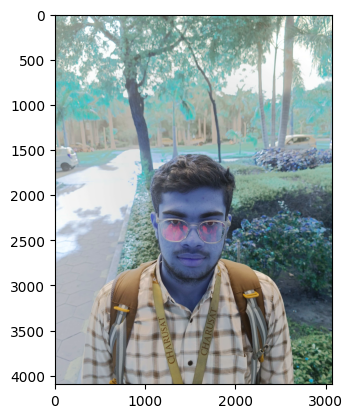

In [20]:
import cv2
import face_recognition
import numpy as np
import matplotlib.pyplot as plt

        
    
img = cv2.imread("Data/val/Ketul/IMG20241127160116_BURST013_32714648.jpg")
plt.imshow(img)

    # Load pre-trained face detection model
face_cascade = cv2.CascadeClassifier('utils/haar_face.xml')


    # Convert the frame to grayscale for face detection
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

for (x, y, w, h) in faces:
     # Extract the face region
    face = img[y:y+h, x:x+w]
        

      # Perform face alignment using facial landmarks
    face_locations = face_recognition.face_locations(img)
    face_landmarks = face_recognition.face_landmarks(img, face_locations)
        #print(face_landmarks)

    for landmarks in face_landmarks:
       # Get coordinates of left eye, right eye, and nose tip
        left_eye = landmarks['left_eye']
        right_eye = landmarks['right_eye']
        nose_tip = landmarks['nose_tip']

            # Calculate the center of mass for the eyes
        left_eye_center = np.mean(left_eye, axis=0).astype(int)
        right_eye_center = np.mean(right_eye, axis=0).astype(int)

            # Calculate the angle between the eyes
        angle = np.degrees(np.arctan2(right_eye_center[1] - left_eye_center[1], right_eye_center[0] - left_eye_center[0]))

            # Perform rotation to align the face
        rotation_matrix = cv2.getRotationMatrix2D(tuple(nose_tip[0]), angle, scale=1)
        aligned_face = cv2.warpAffine(face, rotation_matrix, (w, h), flags=cv2.INTER_LINEAR)

            # Display the original frame, extracted face, and aligned face
        cv2.imwrite("Data/val/ketul/Original.jpg", img)
        cv2.imwrite("Data/val/ketul/Extracted.jpg", face)
        cv2.imwrite("Aligned.jpg", aligned_face)

   

In [23]:
import dlib
import cv2
import face_recognition
import numpy as np

In [24]:
#extract face using dlib

filepath = "Data/train/"
import os

def load_image(filepath):
    
    for folder in os.listdir(filepath):
        for subfolder in os.listdir(filepath+folder):
            img = cv2.imread(filepath + folder + "/" + subfolder)
            
            # Load pre-trained face detection model
            #face_cascade = cv2.CascadeClassifier('utils/haar_face.xml')
            face_detector = dlib.get_frontal_face_detector()
            landmark_predictor = dlib.shape_predictor("utils/shape_predictor_68_face_landmarks.dat")

            # Convert the frame to grayscale for face detection
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # Detect faces in the frame
            #faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)
            faces = face_detector(gray)

            for face in faces:
                
                x, y, w, h = face.left(), face.top(), face.width(), face.height()
                # Extract the face region
                face1 = img[y:y+h, x:x+w]


                # Perform face alignment using facial landmarks
#                 face_locations = face_recognition.face_locations(img)
#                 face_landmarks = face_recognition.face_landmarks(img, face_locations)
#                 #print(face_landmarks)

#                 for landmarks in face_landmarks:
#                     # Get coordinates of left eye, right eye, and nose tip
#                     left_eye = landmarks['left_eye']
#                     right_eye = landmarks['right_eye']
#                     nose_tip = landmarks['nose_tip']

#                     # Calculate the center of mass for the eyes
#                     left_eye_center = np.mean(left_eye, axis=0).astype(int)
#                     right_eye_center = np.mean(right_eye, axis=0).astype(int)

#                     # Calculate the angle between the eyes
#                     angle = np.degrees(np.arctan2(right_eye_center[1] - left_eye_center[1], right_eye_center[0] - left_eye_center[0]))

#                     # Perform rotation to align the face
#                     rotation_matrix = cv2.getRotationMatrix2D(tuple(nose_tip[0]), angle, scale=1)
#                     aligned_face = cv2.warpAffine(face1, rotation_matrix, (w, h), flags=cv2.INTER_LINEAR)

                    # Display the original frame, extracted face, and aligned face
                    #cv2.imwrite('extract_face/Original Frame.jpg', img)
                    #cv2.imwrite('extract_face/Extracted Face.jpg', face)
            cv2.imwrite("extract_face/" + folder + "/" + subfolder, face1)
            

In [25]:
load_image(filepath)

In [26]:

filepath = "Data/train/Kavan"
import os

def load_image_kavan(filepath):
    
    #for folder in os.listdir(filepath):
        for subfolder in os.listdir(filepath):
            img = cv2.imread(filepath + "/" + subfolder)
            
            # Load pre-trained face detection model
            #face_cascade = cv2.CascadeClassifier('utils/haar_face.xml')
            face_detector = dlib.get_frontal_face_detector()
            landmark_predictor = dlib.shape_predictor("utils/shape_predictor_68_face_landmarks.dat")

            # Convert the frame to grayscale for face detection
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # Detect faces in the frame
            #faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)
            faces = face_detector(gray)

            for face in faces:
                
                x, y, w, h = face.left(), face.top(), face.width(), face.height()
                # Extract the face region
                face1 = img[y:y+h, x:x+w]


                # Perform face alignment using facial landmarks
                face_locations = face_recognition.face_locations(img)
                face_landmarks = face_recognition.face_landmarks(img, face_locations)
                #print(face_landmarks)

                for landmarks in face_landmarks:
                    # Get coordinates of left eye, right eye, and nose tip
                    left_eye = landmarks['left_eye']
                    right_eye = landmarks['right_eye']
                    nose_tip = landmarks['nose_tip']

                    # Calculate the center of mass for the eyes
                    left_eye_center = np.mean(left_eye, axis=0).astype(int)
                    right_eye_center = np.mean(right_eye, axis=0).astype(int)

                    # Calculate the angle between the eyes
                    angle = np.degrees(np.arctan2(right_eye_center[1] - left_eye_center[1], right_eye_center[0] - left_eye_center[0]))

                    # Perform rotation to align the face
                    rotation_matrix = cv2.getRotationMatrix2D(tuple(nose_tip[0]), angle, scale=1)
                    aligned_face = cv2.warpAffine(face1, rotation_matrix, (w, h), flags=cv2.INTER_LINEAR)

                    # Display the original frame, extracted face, and aligned face
                    #cv2.imwrite('extract_face/Original Frame.jpg', img)
                    #cv2.imwrite('extract_face/Extracted Face.jpg', face)
                    cv2.imwrite("extract_face/Rutvik" + "/" + subfolder, face1)


In [27]:
load_image_kavan(filepath)

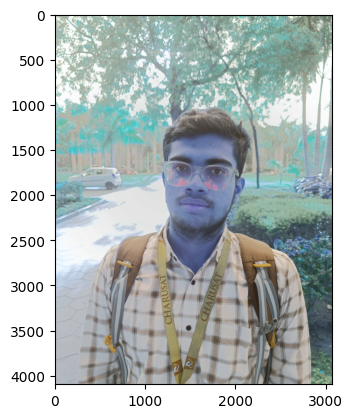

In [37]:
img = cv2.imread("Data/val/Ketul/IMG20241127160112_BURST001_32714670.jpg")
plt.imshow(img)

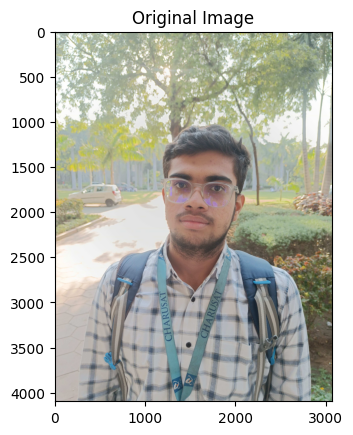

Detected faces: [[1097 1365  931  931]
 [2040  812   69   69]
 [1667  242   52   52]
 [ 908  224   63   63]]
Processing face 0...
Left eye landmarks: [(1334, 1708), (1376, 1683), (1432, 1688), (1480, 1733), (1422, 1743), (1367, 1737)]
Right eye landmarks: [(1701, 1750), (1755, 1715), (1814, 1717), (1856, 1752), (1813, 1776), (1754, 1770)]
Nose tip landmarks: [(1463, 1955), (1500, 1976), (1542, 1994), (1589, 1985), (1638, 1974)]
Calculated alignment angle: 4.651614456640622
Corrected center for rotation: (1546, 1976)
Aligned face saved to Aligned_Face_0.jpg


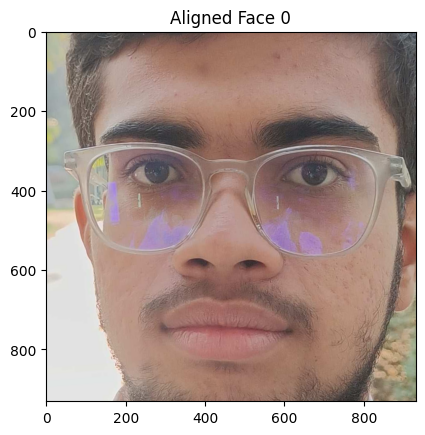

In [42]:
import cv2
import face_recognition
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread("Data/val/Ketul/IMG20241127160112_BURST001_32714670.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.show()

# Load pre-trained face detection model (Haar Cascade)
face_cascade = cv2.CascadeClassifier("utils/haar_face.xml")

# Convert the image to grayscale for face detection
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect faces in the image
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)
print(f"Detected faces: {faces}")

# Process only the first detected face (Face 0)
if len(faces) > 0:
    x, y, w, h = faces[0]
    print(f"Processing face 0...")

    # Extract the face region
    face = img[y : y + h, x : x + w]

    # Perform face alignment using facial landmarks
    face_locations = face_recognition.face_locations(img)
    face_landmarks = face_recognition.face_landmarks(img, face_locations)

    if len(face_landmarks) == 0:
        print("No facial landmarks detected for face 0.")
    else:
        # Use the first set of detected landmarks
        landmarks = face_landmarks[0]

        # Get coordinates of left eye, right eye, and nose tip
        left_eye = landmarks["left_eye"]
        right_eye = landmarks["right_eye"]
        nose_tip = landmarks["nose_tip"]

        # Debug prints
        print(f"Left eye landmarks: {left_eye}")
        print(f"Right eye landmarks: {right_eye}")
        print(f"Nose tip landmarks: {nose_tip}")

        # Ensure nose_tip has valid points
        if len(nose_tip) > 0:
            # Calculate the center of mass for the eyes
            left_eye_center = np.mean(left_eye, axis=0).astype(int)
            right_eye_center = np.mean(right_eye, axis=0).astype(int)

            # Calculate the angle between the eyes
            angle = np.degrees(
                np.arctan2(
                    right_eye_center[1] - left_eye_center[1],
                    right_eye_center[0] - left_eye_center[0],
                )
            )
            print(f"Calculated alignment angle: {angle}")

            # Calculate the center of the nose tip
            center = tuple(map(int, np.mean(nose_tip, axis=0)))
            print(f"Corrected center for rotation: {center}")

            # Perform rotation to align the face
            rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale=1.0)

            # Rotate the entire image
            aligned_img = cv2.warpAffine(
                img,
                rotation_matrix,
                (img.shape[1], img.shape[0]),
                flags=cv2.INTER_LINEAR,
            )

            # Extract the aligned face from the rotated image
            aligned_face = aligned_img[y : y + h, x : x + w]

            # Save and display the aligned face
            output_file = f"Aligned_Face_0.jpg"
            cv2.imwrite(output_file, aligned_face)
            print(f"Aligned face saved to {output_file}")

            plt.imshow(cv2.cvtColor(aligned_face, cv2.COLOR_BGR2RGB))
            plt.title("Aligned Face 0")
            plt.show()
        else:
            print("Nose tip landmarks not detected for face 0. Skipping alignment.")
else:
    print("No faces detected.")